### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import dataset

In [8]:
data=pd.read_csv('C:/Users/SREEJA/Desktop/car_data.txt',sep=","
                 ,names= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

In [9]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
data.shape

(1728, 7)

In [12]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [13]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
data.buying.value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [15]:
data.maint.value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

In [16]:
data.doors.value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [17]:
data.persons.value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [18]:
data.lug_boot.value_counts()

small    576
med      576
big      576
Name: lug_boot, dtype: int64

In [19]:
data.safety.value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

In [23]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

1. From the above we can see that values in each column are categorical.
2. So no need to change the datatype.
3. no need to check for outliers.

### EDA

<AxesSubplot:xlabel='buying', ylabel='count'>

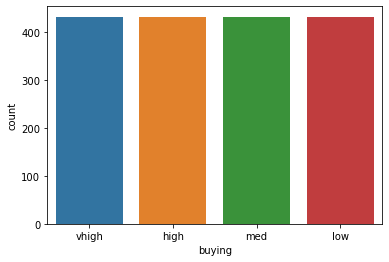

In [24]:
sns.countplot(data['buying'])

<AxesSubplot:xlabel='buying', ylabel='Count'>

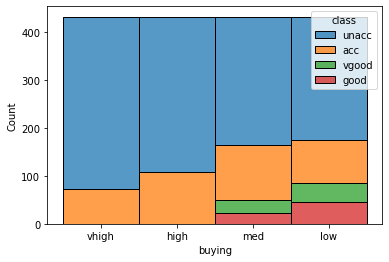

In [25]:
sns.histplot(x='buying',hue='class',data=data,stat='count',multiple='stack')

### Declare feature and target variable

In [27]:
X=data.drop(['class'],axis=1)
y=data['class']

### Splitting data into training and testing data set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [30]:
X_train.shape,X_test.shape

((1209, 6), (519, 6))

In [31]:
import category_encoders as ce

In [33]:
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [34]:
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [35]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
337,1,1,1,1,1,1
314,1,2,2,1,2,2
706,2,2,3,2,1,1
1026,3,3,3,2,3,3
1154,3,2,3,3,3,2


### Model Building

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [39]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
y_pred=dt.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print("accuracy score: ",accuracy_score(y_test,y_pred))

accuracy score:  0.8053949903660886


### Check for overfitting and underfitting

In [42]:
print("Training score: ",dt.score(X_train,y_train))
print("Testing score: ",dt.score(X_test,y_test))

Training score:  0.7758478081058726
Testing score:  0.8053949903660886


### visualizing the decison trees

[Text(0.625, 0.875, 'X[5] <= 2.5\ngini = 0.459\nsamples = 1209\nvalue = [263, 52, 847, 47]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.58\nsamples = 813\nvalue = [263, 52, 451, 47]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\ngini = 0.634\nsamples = 280\nvalue = [140, 29, 88, 23]'),
 Text(0.125, 0.125, 'gini = 0.498\nsamples = 139\nvalue = [65, 0, 74, 0]'),
 Text(0.375, 0.125, 'gini = 0.638\nsamples = 141\nvalue = [75, 29, 14, 23]'),
 Text(0.75, 0.375, 'X[3] <= 2.5\ngini = 0.479\nsamples = 533\nvalue = [123, 23, 363, 24]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 270\nvalue = [0, 0, 270, 0]'),
 Text(0.875, 0.125, 'gini = 0.64\nsamples = 263\nvalue = [123, 23, 93, 24]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 396\nvalue = [0, 0, 396, 0]')]

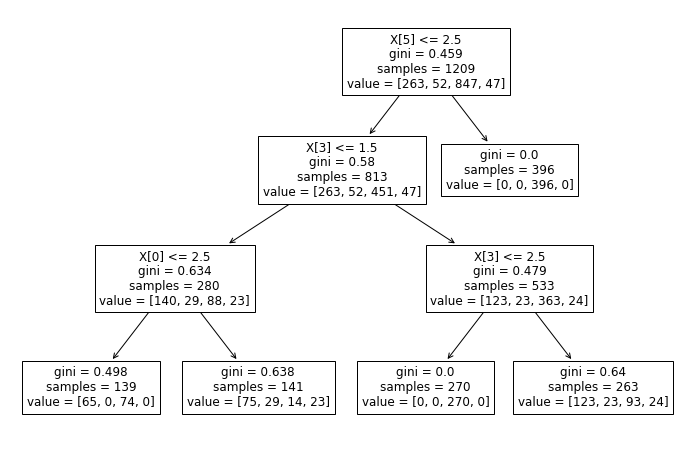

In [43]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt.fit(X_train,y_train))